In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import fetch_openml

In [5]:
# load dataset
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape
x_data = mnist.data
y_data = mnist.target.astype(int)

In [6]:
from sklearn.model_selection import train_test_split
import torch

device = "cuda"
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state=42)

X_train, X_test = torch.Tensor(X_train.values), torch.Tensor(X_test.values)
y_train, y_test = torch.Tensor(y_train.values), torch.Tensor(y_test.values)

In [7]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([56000, 784])
torch.Size([14000, 784])
torch.Size([56000])
torch.Size([14000])


In [10]:
class LogisticRegression(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [12]:
import torch.nn as nn

m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)

print(output.shape)
print(m.weight.shape)

torch.Size([128, 30])
torch.Size([30, 20])


In [18]:
# Set Hyper Parameters

epochs = 10000
input_dim = 784
output_dim = 10
lr = 0.01

model = LogisticRegression(input_dim, output_dim).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [19]:
loss_save_arr = []

for i in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train.long())
    loss.backward()
    optimizer.step()

    loss_save_arr.append(loss.data)

    if (i % 1000 == 0):
        print("====")
        print('epoch ', i)
        print('loss ', loss.data)
        _, pred = torch.max(output.data, axis=1)
        print("train_accuracy {:0.03f}".format(float((pred == y_train).sum() / y_train.size(0))))

        model.eval()
        with torch.no_grad():
            output = model(X_test)
            _, pred = torch.max(output.data, axis = 1)
            print("test_accuracy {:0.03f}".format(float((pred == y_test).sum() / y_test.size(0))))

====
epoch  0
loss  tensor(2.4778, device='cuda:0')
train_accuracy 0.051
test_accuracy 0.084
====
epoch  1000
loss  tensor(1.5616, device='cuda:0')
train_accuracy 0.886
test_accuracy 0.885
====
epoch  2000
loss  tensor(1.5534, device='cuda:0')
train_accuracy 0.895
test_accuracy 0.891
====
epoch  3000
loss  tensor(1.5476, device='cuda:0')
train_accuracy 0.899
test_accuracy 0.896
====
epoch  4000
loss  tensor(1.5454, device='cuda:0')
train_accuracy 0.901
test_accuracy 0.897
====
epoch  5000
loss  tensor(1.5430, device='cuda:0')
train_accuracy 0.902
test_accuracy 0.897
====
epoch  6000
loss  tensor(1.5416, device='cuda:0')
train_accuracy 0.903
test_accuracy 0.899
====
epoch  7000
loss  tensor(1.5405, device='cuda:0')
train_accuracy 0.904
test_accuracy 0.900
====
epoch  8000
loss  tensor(1.5396, device='cuda:0')
train_accuracy 0.904
test_accuracy 0.899
====
epoch  9000
loss  tensor(1.5389, device='cuda:0')
train_accuracy 0.905
test_accuracy 0.900


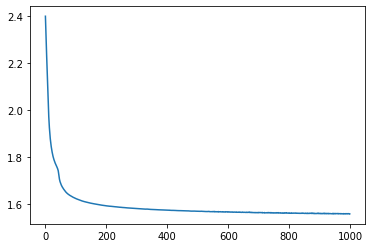

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(range(epochs), [e.to("cpu") for e in loss_save_arr])